<a href="https://colab.research.google.com/github/summerolmstead/Pizza-Sales-Visualization/blob/main/PizzaSalesHeatMap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Summer Olmstead

Data Visualization | Part 2

Pizza Sales

https://www.kaggle.com/datasets/rhonarosecortez/pizza-sales-dataset

In [ ]:
import kagglehub # getting data from kaggle
import os
import pandas as pd

path = kagglehub.dataset_download("rhonarosecortez/pizza-sales-dataset")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/rhonarosecortez/pizza-sales-dataset/versions/2


In [ ]:
dataset_files = os.listdir(path)
print("Dataset files:", dataset_files)

Dataset files: ['Pizza Sales Dataset.csv']


In [ ]:
csv_file_path = os.path.join(path, 'Pizza Sales Dataset.csv')
df = pd.read_csv(csv_file_path)

print(df.head()) # seeing structure of data set and columns etc

   pizza_id  order_id  pizza_name_id  quantity order_date order_day  \
0         1         1     hawaiian_m         1   1/1/2015  Thursday   
1         2         2  classic_dlx_m         1   1/1/2015  Thursday   
2         3         2  five_cheese_l         1   1/1/2015  Thursday   
3         4         2    ital_supr_l         1   1/1/2015  Thursday   
4         5         2     mexicana_m         1   1/1/2015  Thursday   

  order_time  unit_price  total_price pizza_size pizza_category  \
0   11:38:36       13.25        13.25          M        Classic   
1   11:57:40       16.00        16.00          M        Classic   
2   11:57:40       18.50        18.50          L         Veggie   
3   11:57:40       20.75        20.75          L        Supreme   
4   11:57:40       16.00        16.00          M         Veggie   

                                   pizza_ingredients  \
0           Sliced Ham, Pineapple, Mozzarella Cheese   
1  Pepperoni, Mushrooms, Red Onions, Red Peppers,...   
2 

In [ ]:
df.info() # checking for null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   pizza_id           48620 non-null  int64         
 1   order_id           48620 non-null  int64         
 2   pizza_name_id      48620 non-null  object        
 3   quantity           48620 non-null  int64         
 4   order_date         48620 non-null  datetime64[ns]
 5   order_day          48620 non-null  category      
 6   order_time         48620 non-null  int32         
 7   unit_price         48620 non-null  float64       
 8   total_price        48620 non-null  float64       
 9   pizza_size         48620 non-null  object        
 10  pizza_category     48620 non-null  object        
 11  pizza_ingredients  48620 non-null  object        
 12  pizza_name         48620 non-null  object        
 13  order_month        48620 non-null  int32         
dtypes: cat

In [ ]:
#checking for nan values
df.isna().sum()

,0
pizza_id,0
order_id,0
pizza_name_id,0
quantity,0
order_date,0
order_day,0
order_time,0
unit_price,0
total_price,0
pizza_size,0


In [ ]:
#no NaN values! lets look for outliers , this is good for real life data but we wont get rid of outlier data
from scipy.stats import zscore

#calculate Z-scores for numeric columns
df['quantity_zscore'] = zscore(df['quantity'])
df['unit_price_zscore'] = zscore(df['unit_price'])
df['total_price_zscore'] = zscore(df['total_price'])

#threshold for outliers (e.g., Z-score > 3 or < -3)
threshold = 3

#outliers in each column
outliers_quantity = df[df['quantity_zscore'].abs() > threshold]
outliers_unit_price = df[df['unit_price_zscore'].abs() > threshold]
outliers_total_price = df[df['total_price_zscore'].abs() > threshold]

#printing outliers
print("Outliers based on Z-score for quantity:")
print(outliers_quantity)
print("Outliers based on Z-score for unit price:")
print(outliers_unit_price)
print("Outliers based on Z-score for total price:")
print(outliers_total_price)

Outliers based on Z-score for quantity:
       pizza_id  order_id   pizza_name_id  quantity order_date order_day  \
48           49        17  mediterraneo_m         2 2015-01-01  Thursday   
183         184        78    spicy_ital_l         3 2015-01-02    Friday   
211         212        91       bbq_ckn_l         2 2015-01-02    Friday   
222         223        92     the_greek_m         2 2015-01-02    Friday   
245         246       105      hawaiian_s         2 2015-01-02    Friday   
...         ...       ...             ...       ...        ...       ...   
48461     48462     21285    spin_pesto_s         2 2015-12-31  Thursday   
48466     48467     21288   classic_dlx_m         3 2015-12-31  Thursday   
48495     48496     21298      big_meat_s         2 2015-12-31  Thursday   
48575     48576     21331       bbq_ckn_l         2 2015-12-31  Thursday   
48601     48602     21343    spicy_ital_l         2 2015-12-31  Thursday   

       order_time  unit_price  total_price pizz

In [ ]:
#ensure the 'order_date' is in datetime format
df['order_date'] = pd.to_datetime(df['order_date'], format='%m/%d/%Y')

#extract the hour from 'order_time' and convert it into a numeric format
df['order_time'] = pd.to_datetime(df['order_time'], format='%H:%M:%S').dt.hour

#if necessary, convert 'order_day' to categorical type (not essential for the plots)
df['order_day'] = pd.Categorical(df['order_day'], categories=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], ordered=True)

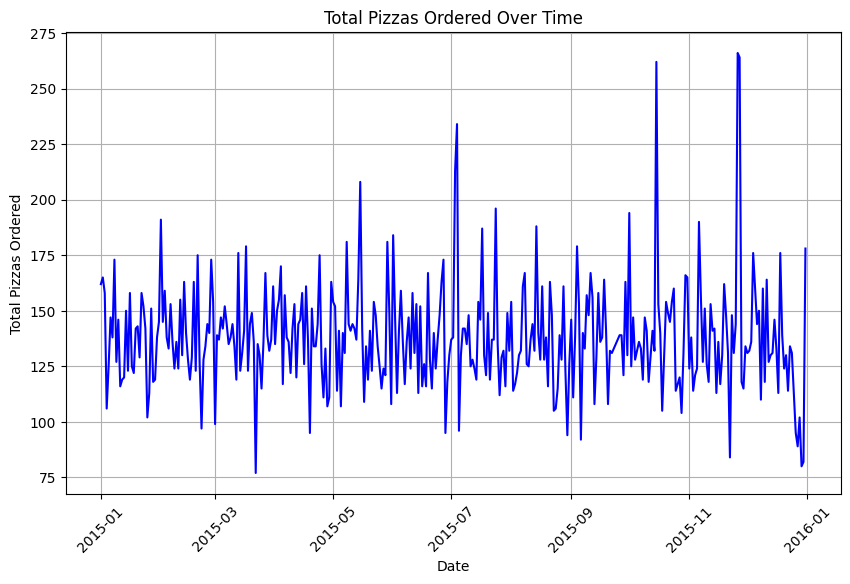

In [ ]:
import matplotlib.pyplot as plt

# Visualizing total pizzas over time for data set

#aggregate by date and sum the quantity of pizzas ordered
daily_orders = df.groupby(df['order_date'].dt.date)['quantity'].sum()

#plotting
plt.figure(figsize=(10, 6))
daily_orders.plot(kind='line', color='blue')
plt.title("Total Pizzas Ordered Over Time")
plt.xlabel("Date")
plt.ylabel("Total Pizzas Ordered")
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

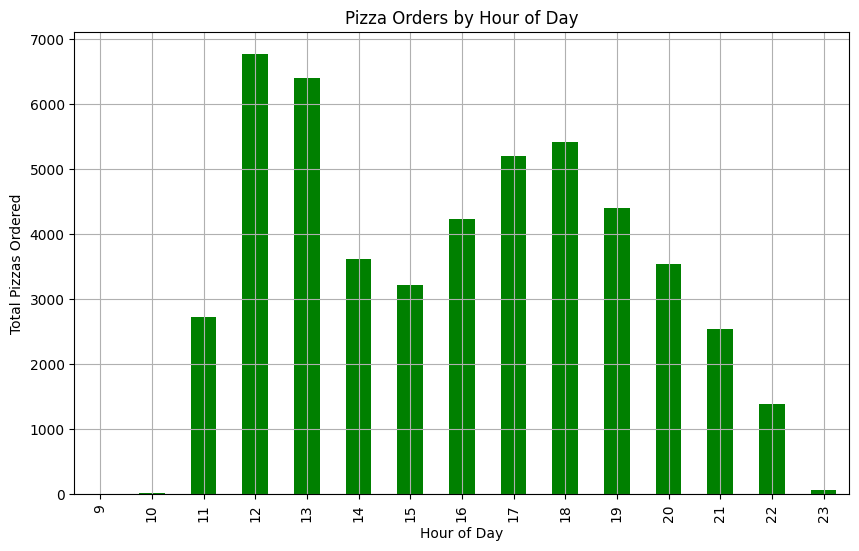

In [ ]:
# Lets try to visualize the pizza order based on the hour of the day to see what hours is most possible prob best in a bar chart
#aggregate by hour and sum the quantity of pizzas ordered
hourly_orders = df.groupby('order_time')['quantity'].sum()

plt.figure(figsize=(10, 6))
hourly_orders.plot(kind='bar', color='green')
plt.title("Pizza Orders by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Total Pizzas Ordered")
plt.grid(True)
plt.show()

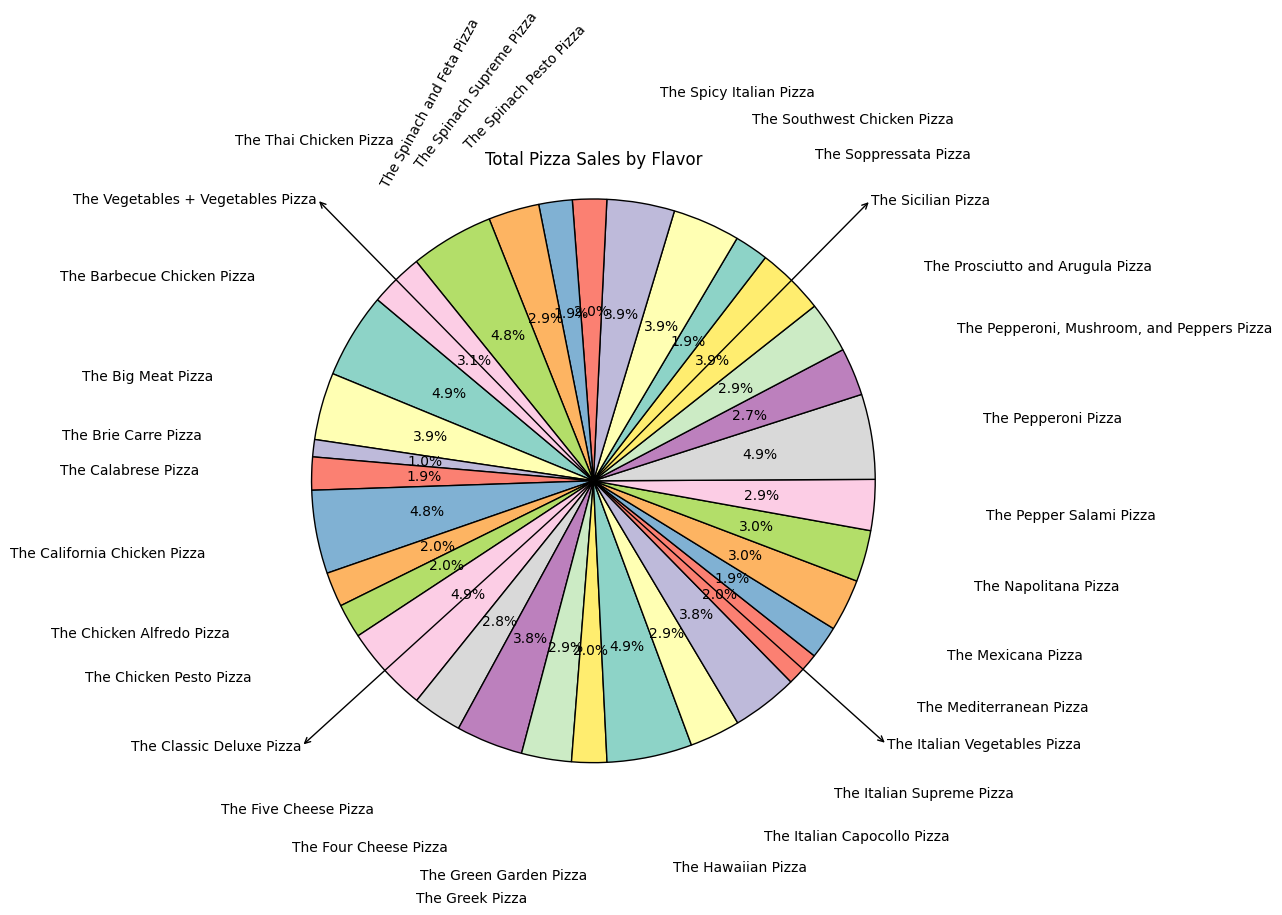

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#the total quantity sold for each pizza flavor for a pie chart! note: code looks complicated but it just is because there was text overlap issues lol
pizza_sales = df.groupby('pizza_name')['quantity'].sum()

#color palette!
colors = sns.color_palette("Set3", n_colors=len(pizza_sales))

#plot the pie chart
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(pizza_sales, labels=pizza_sales.index, autopct='%1.1f%%', colors=colors,
                                  startangle=140, wedgeprops={'edgecolor': 'black'}, labeldistance=1.4)  #increased labeldistance for padding so no overlap text

#adjust the rotation of labels for spinach pizzas (kept overlapping)
for i, text in enumerate(texts):
    label = text.get_text()
    if "Spinach" in label:
        #rotate labels with "Spinach" in the name to prevent overlap......
        angle = wedges[i].theta2 - (wedges[i].theta2 - wedges[i].theta1) / 2  #midpoint of the wedge
        rotation = angle - 45  #adjusting so that the text is rotated accordingly
        text.set_rotation(rotation)  #apply the rotation

#specifically for the greek pizzas to not overlap lol this didnt work for spinach so prev method was for spinach
for text in texts:
    #current label position
    x_pos, y_pos = text.get_position()

    if "Greek" in text.get_text():
        text.set_position((x_pos, y_pos - 0.1))  #lower the Greek Pizza label

#lines to connect labels to slices
for i, wedge in enumerate(wedges):
    #the angle for each wedge and calculate the position of the line
    angle = (wedge.theta2 + wedge.theta1) / 2

    #convert angle to radians
    angle_rad = np.deg2rad(angle)

    #calculate coordinates for line
    x = np.cos(angle_rad) * 1.4  #position the line outside the wedge (further to closer to label to know which one is which)
    y = np.sin(angle_rad) * 1.4

    #draw a line from the center of the pie chart to the label
    ax.annotate('', xy=(x, y), xytext=(0, 0),
                arrowprops=dict(arrowstyle="->", color='black', lw=1))

plt.title("Total Pizza Sales by Flavor")
plt.axis('equal')  #equal aspect ratio
plt.show()

<ipython-input-53-c3e6ddc677fc>:5: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_data = df.pivot_table(values='quantity', index='order_day', columns='order_time', aggfunc='sum')


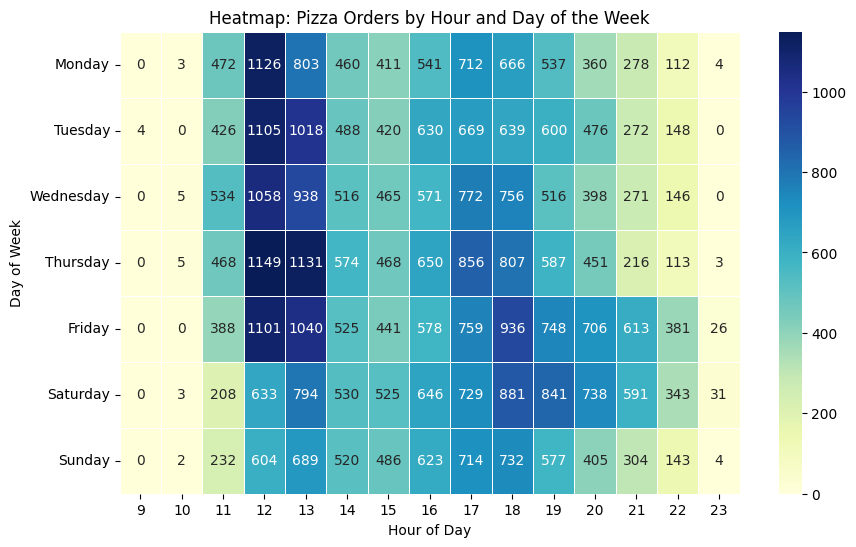

In [ ]:
import seaborn as sns

#Lets make a heat map because this will be the most interesting for utilizing time series aspect to see what times are the best for business
#pivot table for orders by hour and day of the week!
heatmap_data = df.pivot_table(values='quantity', index='order_day', columns='order_time', aggfunc='sum')

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt="d", linewidths=.5)
plt.title("Heatmap: Pizza Orders by Hour and Day of the Week")
plt.xlabel("Hour of Day")
plt.ylabel("Day of Week")
plt.show()